# 12 二項検定

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
%matplotlib inline
from itertools import cycle
import pyper

sns.set(style='ticks')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

## 12.2
### 12.2.1

In [12]:
# scipy.stats.bino.pmf(x,n,p): n回試行で確率pの事象がx回起こる確率
stats.binom.pmf(17, 20, 0.5)

0.0010871887207031235

In [13]:
num_win = np.arange(0,21)
num_win

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [14]:
stats.binom.pmf(num_win, 20, 0.5)

array([9.53674316e-07, 1.90734863e-05, 1.81198120e-04, 1.08718872e-03,
       4.62055206e-03, 1.47857666e-02, 3.69644165e-02, 7.39288330e-02,
       1.20134354e-01, 1.60179138e-01, 1.76197052e-01, 1.60179138e-01,
       1.20134354e-01, 7.39288330e-02, 3.69644165e-02, 1.47857666e-02,
       4.62055206e-03, 1.08718872e-03, 1.81198120e-04, 1.90734863e-05,
       9.53674316e-07])

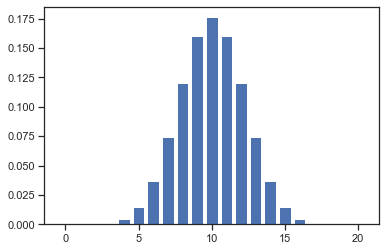

In [15]:
plt.bar(num_win, stats.binom.pmf(num_win,20,0.5))
plt.show()

In [21]:
# 勝利数がx以下である確率(下側確率)
np.round(stats.binom.cdf(num_win,20,0.5), decimals=4)

array([0.000e+00, 0.000e+00, 2.000e-04, 1.300e-03, 5.900e-03, 2.070e-02,
       5.770e-02, 1.316e-01, 2.517e-01, 4.119e-01, 5.881e-01, 7.483e-01,
       8.684e-01, 9.423e-01, 9.793e-01, 9.941e-01, 9.987e-01, 9.998e-01,
       1.000e+00, 1.000e+00, 1.000e+00])

In [30]:
# p値
# 勝利数が16勝以下になる確率
stats.binom.cdf(16,20,0.5)

0.9987115859985352

In [31]:
# 勝利数が<<17勝>>以上になる確率のp値
# 第一引数が16であることに注意
stats.binom.sf(16,20,0.5)

0.0012884140014648435

## 12.3
### 12.3.1
1. 帰無仮説$H_0$: $\pi = \cfrac{1}{3}$（この予測法にはじゃんけんの手を当てる力がない）\
   対立仮説$H_1$: $\pi > \cfrac{1}{3}$（この予測法はじゃんけんの手を当てる力がある）
2. 検定統計量: 10下位のじゃんけん勝負のうち手を当てた回数
3. 有意水準$\alpha = 0.05$。片側検定。
4. 検定統計量の実現値: 手を当てた回数7回
5. 帰無仮説の棄却or採択の決定

In [33]:
num = np.arange(11)
np.round(stats.binom.cdf(num,10,1/3), decimals=4)

array([0.0173, 0.104 , 0.2991, 0.5593, 0.7869, 0.9234, 0.9803, 0.9966,
       0.9996, 1.    , 1.    ])

的中回数が5回以下の確率が0.9234、6回以下の確率が0.9803なので、棄却域は7回以上となる。\
よって帰無仮説は棄却される。\
ちなみにp値は以下。

In [34]:
stats.binom.sf(6,10,1/3)

0.019661636945587556

これは有意水準0.05よりも低いので、帰無仮説は棄却される。